# Анализ рынка видеоигр и выявление критериев успешности продукта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('***')

### Общая информация

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Описание и выявленные проблемы в данных**

Датафрейм содержит 16715 строк в 11-и столбцах. Типы данных: *float*, *object*.

Существенные пропуски имеются в столбцах: *Year_of_Release*, *Critic_Score*, *User_Score*, *Rating*.
<br>
Некорректный тип данных присутствует в столбцах: *Year_of_Release*, *User_Score*.

### Предобработка данных

#### Тип данных

In [5]:
# Приводим названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

Год выпуска продукта является основополагающим параметром для формирования выборки за актуальный период. Поэтому если год выпуска не указан, то такие продукты можно отбросить (объем отброшенного не должен превышать 10% от общего объема данных)

In [6]:
new_data = data.dropna(subset=['year_of_release'])
new_data.shape[0] / data.shape[0]

0.9839066706551002

In [7]:
data.query('year_of_release.isna()')[['na_sales', 'eu_sales', 'jp_sales']].sum() / \
data[['na_sales', 'eu_sales', 'jp_sales']].sum()

na_sales    0.013436
eu_sales    0.010088
jp_sales    0.005164
dtype: float64

In [8]:
# Отброшено менее 2% данных
# Отброшено менее 3% общего объема продаж
# Перезаписываем основной датафрейм
data = new_data

In [9]:
# Приводим год выпуска к общепринятому целочисленному типу
data['year_of_release'] = data['year_of_release'].astype('int')

In [10]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце *user_score* присутствуют значения 'tbd' типа *object*. Преобразование типа данных в столбце целесообразно провести после преобразования указанных значений.

#### Работа с пропусками

In [13]:
# Ищем и по возможности удаляем строки без указания имени и жанра продукта
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [14]:
data = data.dropna(subset=['name'])

**Возможные причины возникновения пропусков**

Существенные пропуски присутствуют в столбцах: *critic_score*, *user_score*, *rating*. Пропуски могли возникнуть по причине того, что оценки критиков и пользователей могли не формироваться по части продуктов, не имеющих достаточных объемов продаж либо не имеющих инструментов сбора отзывов. В столбце *user_score* присутствуют значения 'tbd', наиболее вероятно, означающие что отзыв находится в процессе формирования (еще не готов). Данные значения можно изменить на 'nan'.

In [15]:
# Заменяем значения 'tbd' на 'nan'
data = data.replace({'user_score': {'tbd': np.NaN}})

In [16]:
# Приводим тип данных в столбце 'user_score' к 'float'
data['user_score'] = data['user_score'].astype('float')

**Заполнение пропусков**

В столбцах *critic_score* и *user_score* имеются пропуски. Посмотрим целессобразно ли заполнить их медианными значениями.

In [17]:
# Добавляем столбец с общей суммой продаж по всем регионам
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [18]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [19]:
data['critic_score'].median()

71.0

In [20]:
data['user_score'].median()

7.5

Анализируя представленные данные, можно сделать вывод, что значения оценок критиков и оценок пользователей не зависят от других факторов (например от объема продаж), поэтому нельзя заполнить пропуски в этих столбцах достаточно точными значениями. Кроме того заполнение пропусков в этих столбцах медианными значениями приведет к тому, что оценки получат продукты, продажи которых ничтожно малы и скорее всего такие оценки будут существенно завышенными для этих продуктов.

(Можно заполнить пропуски в возрастных рейтингах по преобладающим значениям рейтингов в различных жанрах.) - заменяем на:
<br>
Пропуски в возрастных рейтингах могли возникнуть по естественным причинам (территориальная ограниченность распространения данного рейтинга), поэтому заполним их значением "неизвестный рейтинг".

In [23]:
data['rating'].fillna('неизвестный рейтинг', inplace=True)

In [24]:
# Проверяем результат
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [25]:
# Проверяем датасет на наличие полных дублей
data.duplicated().sum()

0

In [26]:
# Поиск дубликатов по значениям в отдельных столбцах
data.query('(name + platform + year_of_release.astype("str")).str.lower().duplicated(keep=False)')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


In [27]:
# Удалим дубликат, найденный на предыдущем шаге
i = data.query('(name + platform + year_of_release.astype("str")).str.lower().duplicated()').index
data.drop(index=i, inplace=True)

### Исследовательский анализ данных

#### Анализ продаж игр по годам

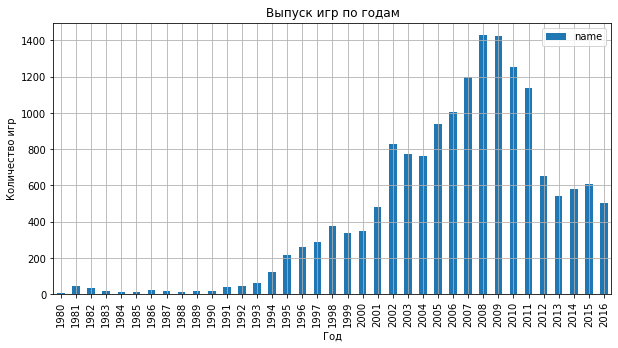

In [28]:
pd.pivot_table(
    data, index='year_of_release',
    values='name',
    aggfunc='count'
).plot(kind='bar', figsize=(10, 5), grid=True)
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.title('Выпуск игр по годам')
plt.show()

Выпуски игр сопоставимые с текущими начались с 1995 года. Данные до 1995 года для текущего исследования не важны. 

In [29]:
# Определяем суммарные продажи по платформам
platform_total_sales = (
    pd
    .pivot_table(data, index=['platform'], values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
).reset_index()
platform_total_sales

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


#### Изменение продаж игр по топовым платформам по годам

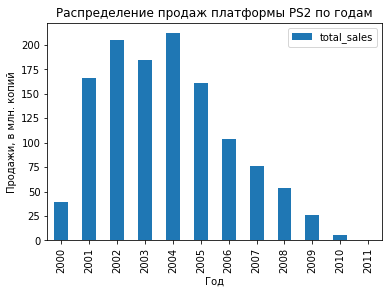

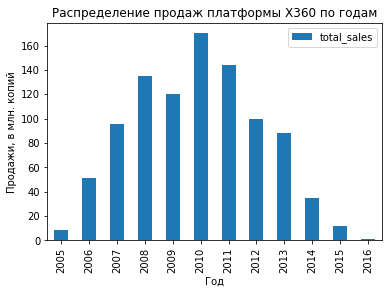

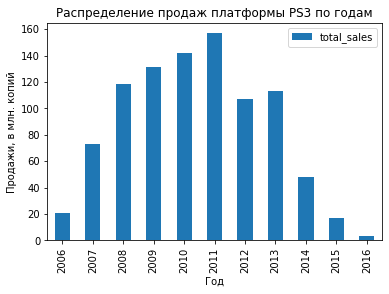

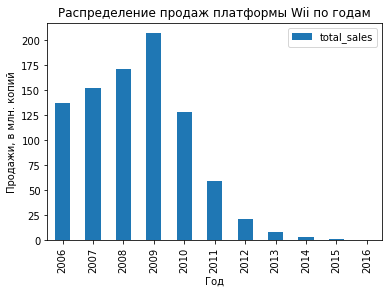

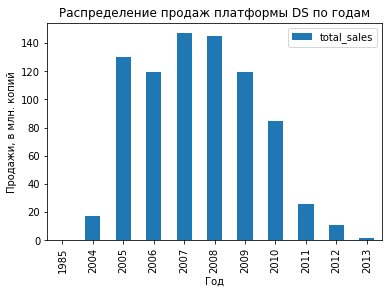

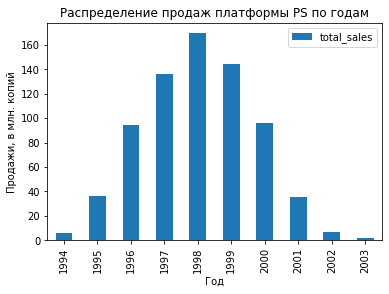

In [30]:
top_platforms = []
for value in platform_total_sales['platform'].head(6):
    pd.pivot_table(
        data.query('platform == @value'),
        index='year_of_release',
        values='total_sales',
        aggfunc='sum'
    ).plot(kind='bar')
    plt.xlabel('Год')
    plt.ylabel('Продажи, в млн. копий')
    plt.title(f'Распределение продаж платформы {value} по годам')
    top_platforms.append(value)

In [31]:
# Ищем и удаляем аномалию (так как платформа появилась в 2004 году)
data.query('(platform == "DS") & (year_of_release == 1985)')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,неизвестный рейтинг,0.02


In [32]:
i = data.query('(platform == "DS") & (year_of_release == 1985)').index
data.drop(index=i, inplace=True)

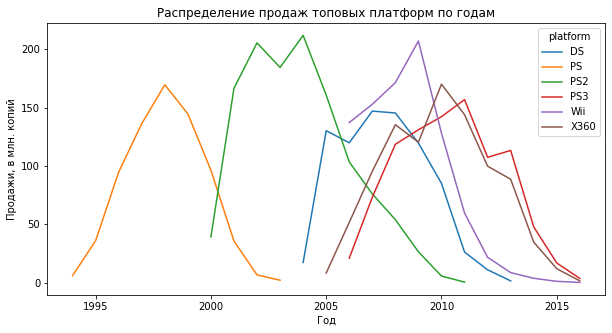

In [33]:
pd.pivot_table(
    data.query('platform in @top_platforms'),
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).plot(figsize=(10, 5))
plt.xlabel('Год')
plt.ylabel('Продажи, в млн. копий')
plt.title(f'Распределение продаж топовых платформ по годам')
plt.show()

По результатам анализа 6-и наиболее продаваемых платформ можно сделать вывод, что "жизненный цикл" платформы составляет примерно 10 лет. Пик продаж в среднем приходится на середину этого срока - 5 лет. Частота появления новых платформ неоднородна. В 95-2005 годах новые "топовые" платформы появлялись с частотой примерно 1 раз в 5 лет. А в 2005 году в интервале 1 - 2 года появилось сразу 4 новые "топовые" платформы.

Нужно отметить, что к 2016 г. все лидеры продаж находятся на последней стадии "жизненного цикла" или уже завершили его.

В качестве **актуального периода** для прогноза на 2017 год возьмем последние **2 года** (2015 г. и 2016 г.)



#### Распределение продаж по платформам за актуальный период

In [34]:
# Сохраняем исходный (текущий) датафрейм в переменную
df = data
# Перезаписываем рабочую переменную датафреймом за установленный актуальный период
data = data.query('2015 <= year_of_release <= 2016')

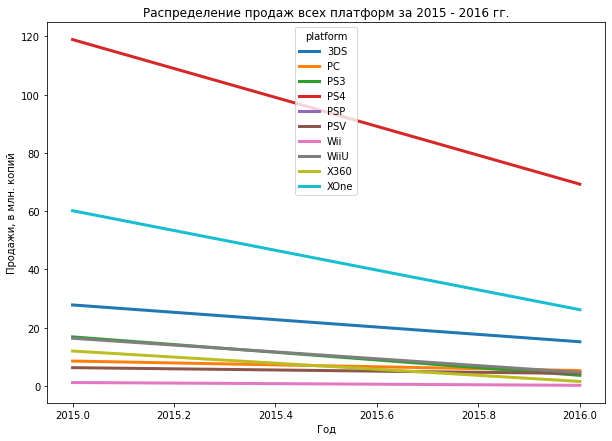

In [35]:
pd.pivot_table(
    data,
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).plot(figsize=(10, 7), linewidth=3)
plt.xlabel('Год')
plt.ylabel('Продажи, в млн. копий')
plt.title('Распределение продаж всех платформ за 2015 - 2016 гг.')
plt.show()

С учетом изложенного выше анализа можно определить наиболее перспективные платформы: **PS4**, **XOne** (эти платформы являются продолжением платформ - исторических лидеров продаж). Их срок возникновения составляет 3 года и они находятся на стадии роста (спад продаж в 2016 г. - общая тенденция). Немного отстает от лидеров но тоже является перспективной платформа **3DS**. Платформа **WiiU** может быть интересна тем, что начала "жизненный цикл" в 2012 году и к 2017 году должна выйти на свои пиковые показатели.

Стоит дополнить перечень перспективных платформ играми для **PC**. Так как эта платформа имеет практически неограниченный "жизненный цикл".

#### Анализ потенциально прибыльных платформ

In [36]:
# Создаем список потенциально прибыльных платформ
top_profit_platforms = ['PS4', 'XOne', '3DS', 'WiiU', 'PC']

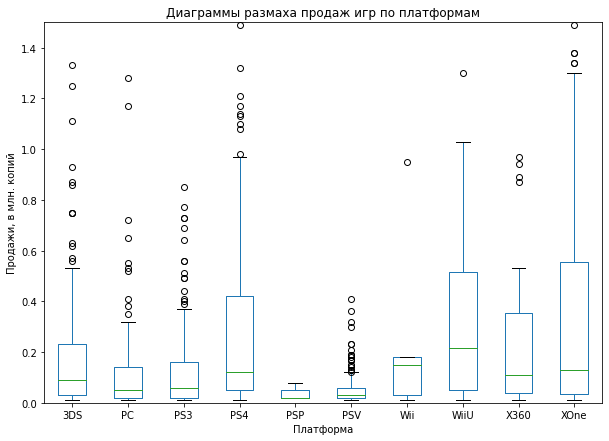

In [37]:
# Строим "ящик с усами" по продажам топовых платформ
pd.pivot_table(
    data, #.query('platform in @top_profit_platforms')
    index='name',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).plot(kind='box', figsize=(10, 7))
plt.ylim(0, 1.5)
plt.xlabel('Платформа')
plt.ylabel('Продажи, в млн. копий')
plt.title('Диаграммы размаха продаж игр по платформам')
plt.show()

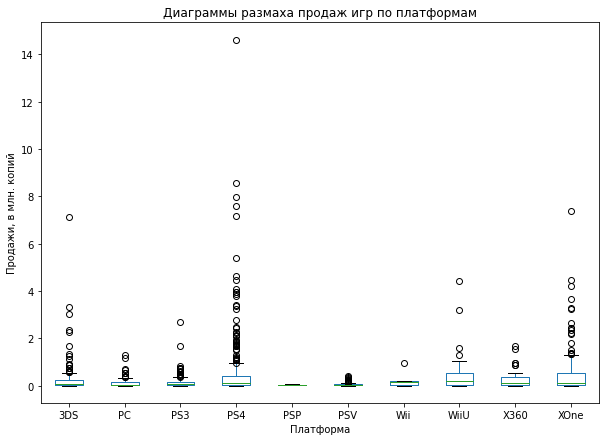

In [38]:
# То же самое без ограничения интервала по оси 'y'
pd.pivot_table(
    data, #.query('platform in @top_profit_platforms'),
    index='name',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).plot(kind='box', figsize=(10, 7))
plt.xlabel('Платформа')
plt.ylabel('Продажи, в млн. копий')
plt.title('Диаграммы размаха продаж игр по платформам')
plt.show()

Наблюдается смещение 3-ей квартили и "усов" в сторону увеличения объема продаж. Также отклонение объемов продаж игр, находящееся за пределами "усов", на порядок отличается от значений внутри "ящика". Это свидетельствует о большом разбросе в объемах продаж игр (есть очень популярные игры и есть основная масса игр с умеренной попуряностью).

#### Определение взаимосвязей объемов продаж и отзывов критиков и пользователей

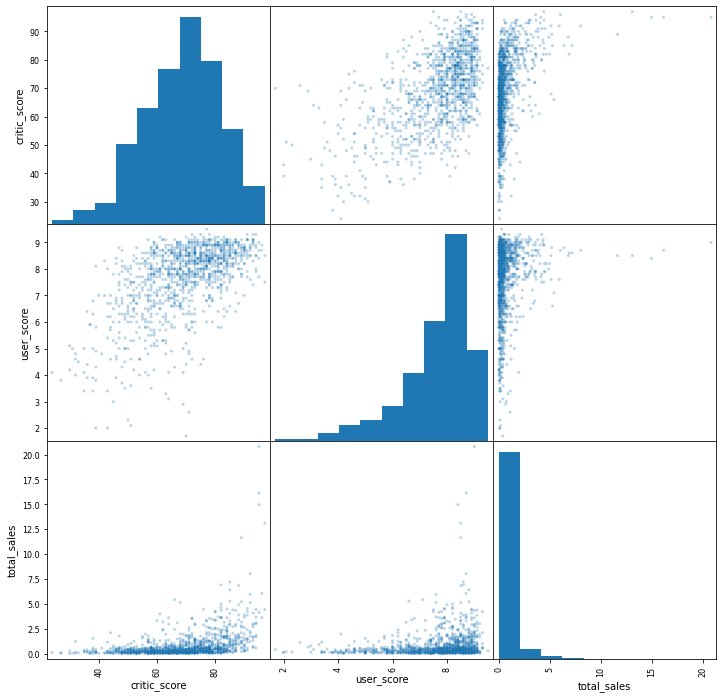

In [39]:
# Построение матрицы диаграмм рассеяния для объемов продаж и оценок критиков и пользователей
pd.plotting.scatter_matrix(
    df.query('platform == "PS2"')[['critic_score', 'user_score', 'total_sales']],
    figsize=(12, 12),
    alpha=0.3
);

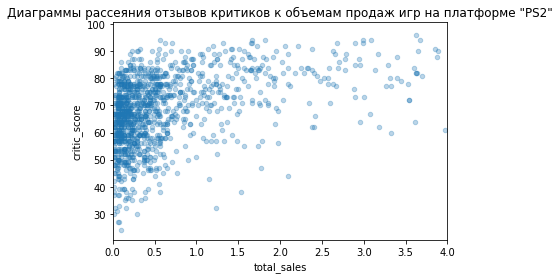

In [40]:
(
    df
    .query('platform == "PS2"')
    .plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.3)
)
plt.xlim(0, 4)
plt.title('Диаграммы рассеяния отзывов критиков к объемам продаж игр на платформе "PS2"')
plt.show()

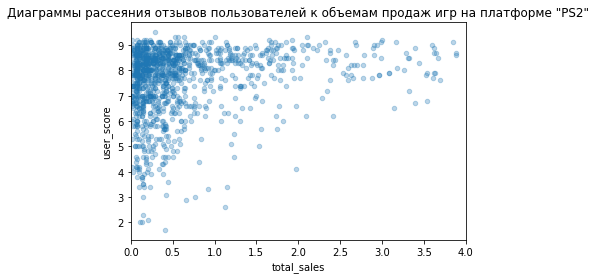

In [41]:
(
    df
    .query('platform == "PS2"')
    .plot(x='total_sales', y='user_score', kind='scatter', alpha=0.3)
)
plt.xlim(0, 4)
plt.title('Диаграммы рассеяния отзывов пользователей к объемам продаж игр на платформе "PS2"')
plt.show()

In [42]:
# Построение матрицы корреляции для объемок продаж и оценок критиков и пользователей (платформа "PS2")
df.query('platform == "PS2"')[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.565841,0.392536
user_score,0.565841,1.000000,0.175055
total_sales,0.392536,0.175055,1.000000


In [43]:
# То же самое по всем платформам
df[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.579920,0.245414
user_score,0.579920,1.000000,0.087935
total_sales,0.245414,0.087935,1.000000


In [44]:
# То же самое по современной платформе (платформа "PS4")
df.query('platform == "PS4"')[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


Зависимость между продажами игр на платформе "PS2" (лидер продаж) и оценками критиков невысокая, а между продажами игр и оценками пользователей - низкая.
<br>
По продажам по всем платформам в целом имеется еще более выраженная тенденция в сторону снижения зависимостей.

Из анализа диаграмм рассеяния можно сделать **вывод:**
<br>
достаточно **много игр с высокой оценкой критиков и слабой выручкой**.

#### Анализ влияния жанров на объем продаж

In [45]:
# Расчет количества игр, объема продаж, среднего и медианного значений в разбивке по жанрам  
genre_stat = (
    data
    .groupby('genre')['total_sales']
    .agg(['count', 'sum', 'mean', 'median'])
    .round(2)
    .sort_values('sum', ascending=False)
)
genre_stat

,count,sum,mean,median
genre,,,,
Shooter,81,105.73,1.31,0.38
Action,431,102.13,0.24,0.06
Sports,107,64.33,0.60,0.12
Role-Playing,132,55.82,0.42,0.12
Misc,71,14.17,0.20,0.06
Fighting,37,12.37,0.33,0.09
Adventure,110,11.98,0.11,0.03
Racing,42,10.86,0.26,0.06
Platform,28,9.28,0.33,0.10


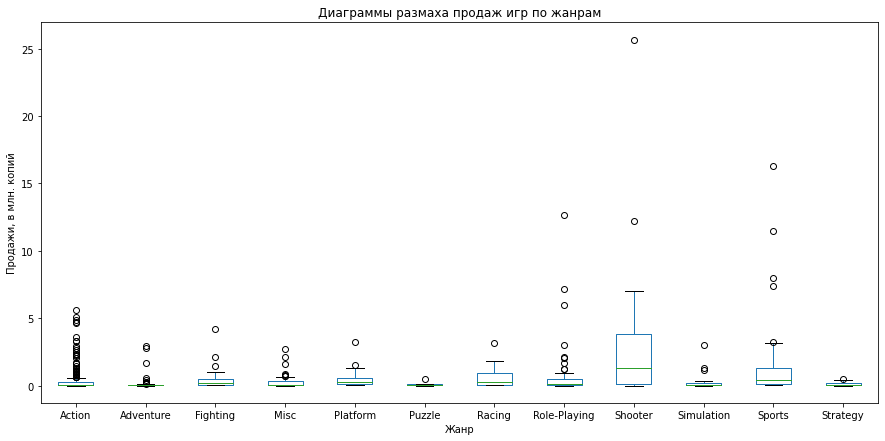

In [46]:
pd.pivot_table(
    data,
    index='name',
    columns='genre',
    values='total_sales',
    aggfunc='sum'
).plot(kind='box', figsize=(15, 7))
plt.xlabel('Жанр')
plt.ylabel('Продажи, в млн. копий')
plt.title('Диаграммы размаха продаж игр по жанрам')
plt.show()

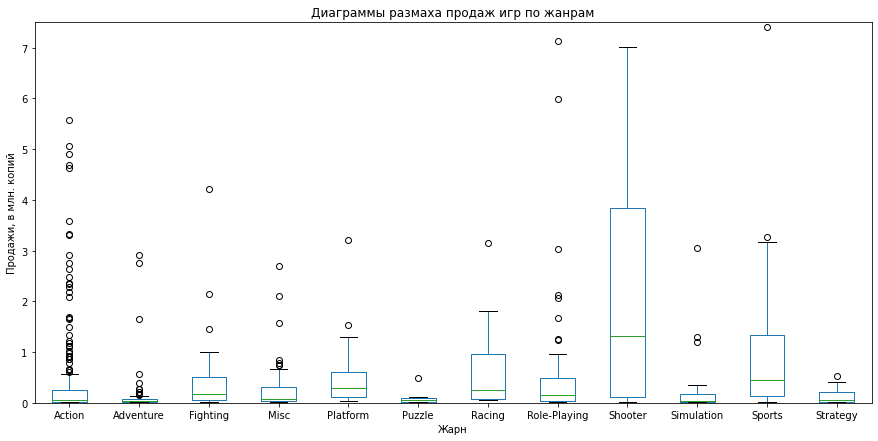

In [47]:
pd.pivot_table(
    data,
    index='name',
    columns='genre',
    values='total_sales',
    aggfunc='sum'
).plot(kind='box', figsize=(15, 7))
plt.ylim(0, 7.5)
plt.xlabel('Жарн')
plt.ylabel('Продажи, в млн. копий')
plt.title('Диаграммы размаха продаж игр по жанрам')
plt.show()

По медианным значениям и размаху квантилей **наилучшие показатели продаж** у жанров (в порядке убывания): **"Шутер"** (лидирует с большим отрывом), **"Спорт"**, "Гонки".
<br>
У жанра "Экшен" наблюдается большое количество выбросов с высокими объемами продаж.
<br>
По абсолютному значению наибольший объем продаж у жанров: "Шутер", "Экшен", "Спорт". Наименьший объем продаж у жанра "Паззл".
<br>
Таким образом жанры "Шутер" и "Спорт" являются лидерами по всем указанным параметрам.

### "Портрет" пользователя каждого региона

Топ 5 популярных игровых платформ США (по объемам продаж)
        count    sum  mean  median
PS4       301  63.86  0.21    0.03
XOne      167  50.30  0.30    0.08
3DS       132  10.31  0.08    0.00
WiiU       42   8.86  0.21    0.10
X360       48   8.05  0.17    0.06
Другие    418  10.41  0.02    0.00


Топ 5 популярных игровых платформ Европы (по объемам продаж)
        count    sum  mean  median
PS4       301  83.54  0.28    0.05
XOne      167  28.10  0.17    0.05
PC        104   9.10  0.09    0.04
3DS       132   7.39  0.06    0.00
PS3       111   7.30  0.07    0.00
Другие    293  12.51  0.04    0.00


Топ 5 популярных игровых платформ Японии (по объемам продаж)
        count    sum  mean  median
3DS       132  23.55  0.18    0.05
PS4       301  12.05  0.04    0.01
PSV       195   8.41  0.04    0.03
PS3       111   4.97  0.04    0.02
WiiU       42   4.12  0.10    0.01
Другие    327   0.30  0.00    0.00




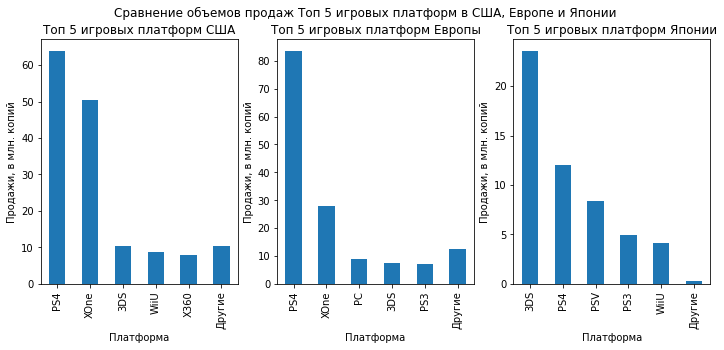

In [48]:
# Расчет количества игр, объема продаж, среднего и медианного значений\
# в разбивке по платформам и регионам
counter = 0
for k in ['na_sales', 'eu_sales', 'jp_sales']:
    counter += 1
    platform_stats_reg = (
        data
        .groupby('platform')[k]
        .agg(['count', 'sum', 'mean', 'median'])
        .round(2)
        .sort_values('sum', ascending=False)
    ).head()
    other = data[~data['platform'].isin(platform_stats_reg.index)]
    other = other.assign(other = 'Другие')
    other = (
        other
        .groupby('other')[k]
        .agg(['count', 'sum', 'mean', 'median'])
        .round(2)      
    )
    platform_stats_reg = platform_stats_reg.append(other)
    
    if k == 'na_sales':
        t = 'США'
    elif k == 'eu_sales':
        t = 'Европы'
    else:
        t = 'Японии'
    print(f'Топ 5 популярных игровых платформ {t} (по объемам продаж)')
    print(platform_stats_reg)
    print()
    print()
    
    plt.subplot(1, 3, counter)
    platform_stats_reg['sum'].plot(kind='bar', figsize=(12, 4.5))
    plt.xlabel('Платформа')
    plt.ylabel('Продажи, в млн. копий')
    plt.title(f'Топ 5 игровых платформ {t}')
    plt.suptitle('Сравнение объемов продаж Топ 5 игровых платформ в США, Европе и Японии')

В **США** наиболее полулярные платформы: - **PS4** и **XOne**.

В **Европе** ситуация аналогичная США, но разрыв между платформами существенный.

В **Японии** наиболее полулярные платформы: **3DS** и **PS4** (существенный разрывом в пользу первой).

Топ 5 популярных жанров пользователей США (по объемам продаж)
              count    sum  mean  median
Shooter          81  48.18  0.59    0.17
Action          431  33.68  0.08    0.00
Sports          107  26.31  0.25    0.04
Role-Playing    132  19.82  0.15    0.01
Misc             71   5.58  0.08    0.01
Другие          286  18.22  0.06    0.00


Топ 5 популярных жанров пользователей Европы (по объемам продаж)
              count    sum  mean  median
Shooter          81  40.28  0.50    0.15
Action          431  34.82  0.08    0.01
Sports          107  27.82  0.26    0.05
Role-Playing    132  17.21  0.13    0.01
Racing           42   6.52  0.16    0.04
Другие          315  21.29  0.07    0.01


Топ 5 популярных жанров пользователей Японии (по объемам продаж)
              count    sum  mean  median
Action          431  23.05  0.05    0.01
Role-Playing    132  13.41  0.10    0.05
Shooter          81   3.79  0.05    0.00
Misc             71   3.19  0.04    0.02
Adventure       110   2.2

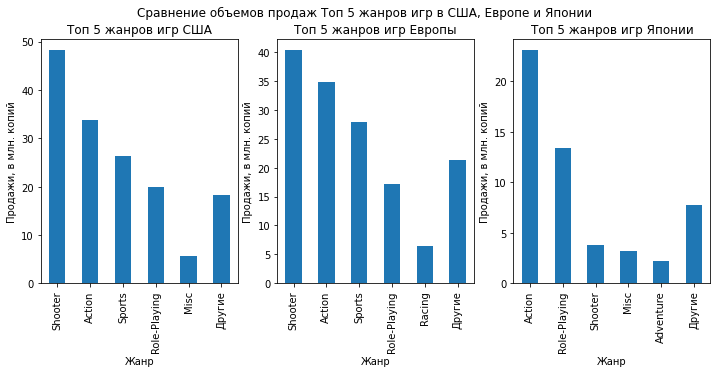

In [49]:
# Расчет количества игр, объема продаж, среднего и медианного значений\
# в разбивке по жанрам и регионам
counter = 0
for k in ['na_sales', 'eu_sales', 'jp_sales']:
    counter += 1
    genre_stats_reg = (
        data
        .groupby('genre')[k]
        .agg(['count', 'sum', 'mean', 'median'])
        .round(2)
        .sort_values('sum', ascending=False)
    ).head()
    other = data[~data['genre'].isin(genre_stats_reg.index)]
    other = other.assign(other = 'Другие')
    other = (
        other
        .groupby('other')[k]
        .agg(['count', 'sum', 'mean', 'median'])
        .round(2)      
    )
    genre_stats_reg = genre_stats_reg.append(other)
    
    if k == 'na_sales':
        t = 'США'
    elif k == 'eu_sales':
        t = 'Европы'
    else:
        t = 'Японии'
    print(f'Топ 5 популярных жанров пользователей {t} (по объемам продаж)')
    print(genre_stats_reg)
    print()
    print()
    
    plt.subplot(1, 3, counter)
    genre_stats_reg['sum'].plot(kind='bar', figsize=(12, 4.5))
    plt.xlabel('Жанр')
    plt.ylabel('Продажи, в млн. копий')
    plt.title(f'Топ 5 жанров игр {t}')
    plt.suptitle('Сравнение объемов продаж Топ 5 жанров игр в США, Европе и Японии')

В **США** наиболее полулярные жанры: **Шутер**, **Экшен** и **Спорт**.

В **Европе** наиболее полулярные жанры аналогичны США.

В **Японии** наиболее полулярные жанры: **Экшен** и **Ролевые игры**.

In [50]:
# Расчет количества игр, объема продаж, среднего и медианного значений\
# в разбивке по рейтингам и регионам
for k in ['na_sales', 'eu_sales', 'jp_sales']:
    rating_stats_reg = (
        data
        .groupby('rating')[k]
        .agg(['count', 'sum', 'mean', 'median'])
        .sort_values('sum', ascending=False)
    )
    if k == 'na_sales':
        t = 'США'
    elif k == 'eu_sales':
        t = 'Европы'
    else:
        t = 'Японии'
    print(f'Топ 5 возрастных категорий (рейтингов) пользователей {t} (по объемам продаж)')
    print(rating_stats_reg.head())
    print()

Топ 5 возрастных категорий (рейтингов) пользователей США (по объемам продаж)
                     count    sum      mean  median
rating                                             
M                      149  47.03  0.315638    0.08
неизвестный рейтинг    513  37.44  0.072982    0.00
E                      153  26.59  0.173791    0.03
T                      192  22.86  0.119063    0.03
E10+                   101  17.87  0.176931    0.05

Топ 5 возрастных категорий (рейтингов) пользователей Европы (по объемам продаж)
                     count    sum      mean  median
rating                                             
M                      149  45.54  0.305638   0.080
неизвестный рейтинг    513  35.71  0.069610   0.000
E                      153  34.83  0.227647   0.040
T                      192  20.32  0.105833   0.035
E10+                   101  11.54  0.114257   0.060

Топ 5 возрастных категорий (рейтингов) пользователей Японии (по объемам продаж)
                     count    sum

Возрастные категории (**рейтинги**) пользователей в **США и Европе** распределены в порядке убывания объемов продаж следующим образом: **"M", "E", "T", "E10+"**; с учетом того, что на 2-м месте находится "неизвестный рейтинг".
В **Японии** распределение следйющее: **"T", "E", "M", "E10+"**; с учетом того, что "неизвестный рейтинг" на первом месте.

### Проверка гипотез

**Гипотеза № 1: cредние пользовательские рейтинги платформ *XOne* и *PC* одинаковые**;

```
H_0: Оценка пользователей (user_score) платформы "XOne" = оценка пользователей (user_score) платформы "PC"
H_a: Оценка пользователей (user_score) платформы "XOne" ≠ оценка пользователей (user_score) платформы "PC"
alpha = 0.05
```
При анализе будем использовать статистический критерий Стьюдента для независимых выборок.
Нет оснований полагать, что в результате выборок будут получены примерно равные датасеты, имеющие примерно равные дисперсии. Поэтому в функции 'ttest_ind' параметру 'equal_var' присвоим значение 'False'.

In [51]:
results = st.ttest_ind(
    data.query('(platform == "XOne") & (~user_score.isna())')['user_score'],
    data.query('(platform == "PC") & (~user_score.isna())')['user_score'],
    equal_var=False
)
alpha = 0.05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value значительно превосходит установленный порог (5%).

Вывод: **не отвергаем гипотезу № 1**.

**Гипотеза № 2: cредние пользовательские рейтинги жанров *Action* (англ. «действие», экшен-игры) и *Sports* (англ. «спортивные соревнования») разные**;

```
H_0: Оценка пользователей (user_score) жанра "Action" = оценка пользователей (user_score) жанра "Sports"
H_a: Оценка пользователей (user_score) жанра "Action" ≠ оценка пользователей (user_score) жанра "Sports"
alpha = 0.05
```
При анализе будем использовать статистический критерий Стьюдента для независимых выборок.
Нет оснований полагать, что в результате выборок будут получены примерно равные датасеты, имеющие примерно равные дисперсии. Поэтому в функции 'ttest_ind' параметру 'equal_var' присвоим значение 'False'.

In [52]:
results = st.ttest_ind(
    data.query('(genre == "Action") & (~user_score.isna())')['user_score'],
    data.query('(genre == "Sports") & (~user_score.isna())')['user_score'],
    equal_var=False
)
alpha = 0.05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

5.97163549920592e-10
Отвергаем нулевую гипотезу


Полученное значение p-value на порядки меньше установленный порог (5%).

Вывод: **не отвергаем гипотезу № 2**.

### Общие выводы

#### Объект исследования и предобработка данных

**Вводные данные**

На исследование предоставлены данные об объемах продаж (в разбивке по регионам) электронных игр, а также различные параметры этих продуктов.

Чсило параметров (столбцов): 11<br>
Число электронных игр (строк): 16715

Выявлены следующие проблемы в данных.<br> 
Существенные пропуски имеются в столбцах: *Year_of_Release*, *Critic_Score*, *User_Score*, *Rating*.<br>
Некорректный тип данных присутствует в столбцах: *Year_of_Release*, *User_Score*.

Пропуски могли возникнуть по причине того, что оценки критиков и пользователей могли не формироваться по части продуктов, не имеющих достаточных объемов продаж либо не имеющих инструментов сбора отзывов. 

**Предобработка данных**

 - Названия столбцов приведены к нижнему регистру.
 - Отброшены продукты без указания года выпуска (менее 2% от общего объема данных), так как год выпуска является основополагающим параметром для целей исследования.
 - Значения в столбце 'year_of_release' (год выпуска) приведены к целочисленному типу.
 - В столбце 'user_score' (оценка пользователей) преобразованы значения 'tbd' в значения 'nan'.
 - Значения в столбце 'user_score' приведены к типу 'float'. 
 - Удалены строки без названия продукта.
 - Анализируя представленные данные, можно сделать вывод, что значения оценок критиков и оценок пользователей не зависят от других факторов (например от объема продаж), поэтому нельзя заполнить пропуски в этих столбцах достаточно точными значениями. Кроме того заполнение пропусков в этих столбцах медианными значениями приведет к тому, что оценки получат продукты, продажи которых ничтожно малы и скорее всего такие оценки будут существенно завышенными для этих продуктов.
 - Пропуски в столбце 'rating' (возростной рейтинг) заполнены значениями "неизвестный рейтинг".

#### Выводы по поставленным вопросам

**Исследовательский анализ данных**

- Выпуски игр сопоставимые с текущими начались с 1995 года. Данные до 1995 года для текущего исследования не важны.
- По результатам анализа 6-и наиболее продаваемых платформ можно сделать вывод, что "жизненный цикл" платформы составляет примерно 10 лет. Пик продаж в среднем приходится на середину этого срока - 5 лет. Частота появления новых платформ неоднородна. В 95-2005 годах новые "топовые" платформы появлялись с частотой примерно 1 раз в 5 лет. А в 2005 году в интервале 1 - 2 года появилось сразу 4 новые "топовые" платформы.<br>
Нужно отметить, что к 2016 г. все лидеры продаж находятся на последней стадии "жизненного цикла" или уже завершили его.
- В качестве актуального периода для прогноза перспективности платформ на 2017 год взяты последние 2 года (2015 г. и 2016 г.)
- **Наиболее перспективные** платформы: **PS4**, **XOne** (эти платформы являются продолжением платформ - исторических лидеров продаж). Их срок возникновения составляет 3 года и они находятся на стадии роста (спад продаж в 2016 г. - общая тенденция). Немного отстает от лидеров но тоже является перспективной платформа **3DS**. Платформа **WiiU** может быть интересна тем, что начала "жизненный цикл" в 2012 году и к 2017 году должна выйти на свои пиковые показатели. Стоит дополнить перечень перспективных платформ играми для **PC**. Так как эта платформа имеет практически неограниченный "жизненный цикл".
- Зависимость между продажами игр на платформе "PS2" (лидер продаж) и оценками критиков невысокая, а между продажами игр и оценками пользователей - низкая. По продажам по всем платформам в целом имеется еще более выраженная тенденция в сторону снижения зависимостей. Из анализа диаграмм рассеяния можно сделать вывод: достаточно **много игр с высокой оценкой критиков и слабой выручкой**.
- По медианным значениям и размаху квантилей **наилучшие показатели продаж** у жанров (в порядке убывания): **"Шутер"** (лидирует с большим отрывом), **"Спорт"**, "Гонки".<br>
У жанра "Экшен" наблюдается большое количество выбросов с высокими объемами продаж.<br>
По абсолютному значению наибольший объем продаж у жанров: "Шутер", "Экшен", "Спорт". Наименьший объем продаж у жанра "Паззл".<br>
Таким образом жанры "Шутер" и "Спорт" являются лидерами по всем указанным параметрам.


**"Портрет" пользователя каждого региона**

- В **США** наиболее полулярные платформы: - **PS4** и **XOne**. В **Европе** ситуация аналогичная США, но разрыв между платформами существенный. В **Японии** наиболее полулярные платформы: **3DS** и **PS4** (существенный разрывом в пользу первой).
- В **США** наиболее полулярные жанры: **Шутер**, **Экшен** и **Спорт**. В **Европе** наиболее полулярные жанры аналогичны США. В **Японии** наиболее полулярные жанры: **Экшен** и **Ролевые игры**.
- Возрастные категории (**рейтинги**) пользователей в **США и Европе** распределены в порядке убывания объемов продаж следующим образом: **"M", "E", "T", "E10+"**; с учетом того, что на 2-м месте находится "неизвестный рейтинг". В **Японии** распределение следйющее: **"T", "E", "M", "E10+"**; с учетом того, что "неизвестный рейтинг" на первом месте.


**Проверка гипотез**

Гипотеза № 1: cредние пользовательские рейтинги платформ XOne и PC одинаковые.<br>
Полученное значение p-value значительно превосходит установленный порог (5%).<br>
Вывод: **не отвергаем гипотезу № 1**.

Гипотеза № 2: cредние пользовательские рейтинги жанров Action и Sports разные.<br>
Полученное значение p-value на порядки меньше установленный порог (5%).<br>
Вывод: **не отвергаем гипотезу № 2**.